In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
yn = pd.read_csv("Wine.csv")

In [3]:
yn.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
yn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
yn.shape

(178, 13)

In [6]:
yn.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# Standard Scalling

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(yn)
scaled_data = pd.DataFrame(scaled_data, columns = yn.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
# Checking Correlation using Heatmap

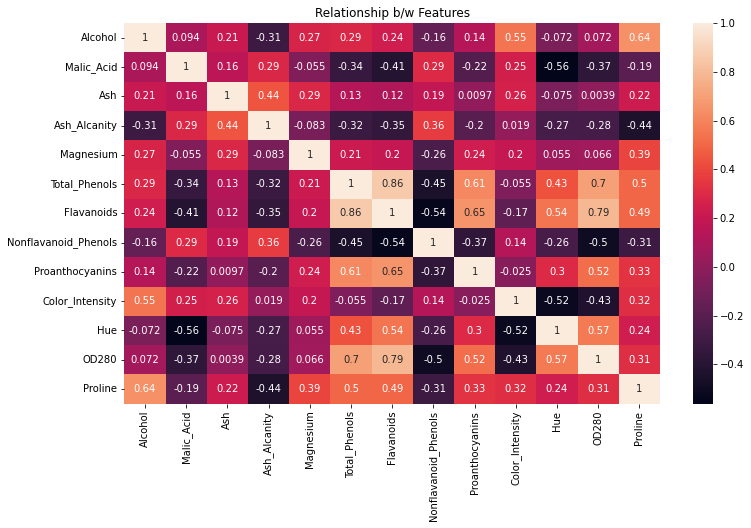

In [10]:
plt.figure(figsize = (12,7))
sns.heatmap(yn.corr(), annot=True)
plt.title('Relationship b/w Features')
plt.show()

In [11]:
yn.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# KMeans Method

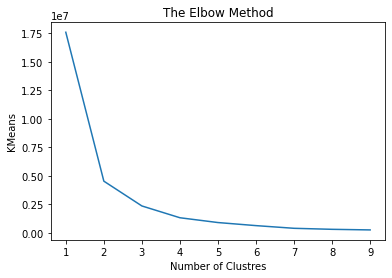

In [12]:
wss = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(yn)
    wss.append(kmeans.inertia_)
plt.plot(range(1,10),wss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clustres")
plt.ylabel("KMeans")
plt.show()

In [13]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


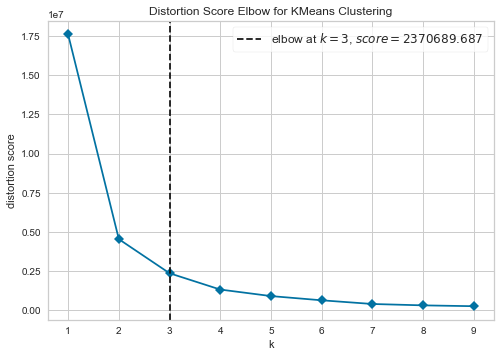

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings =False)
visualizer.fit(yn)
visualizer.show()

In [15]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(yn)
    score  =silhouette_score(yn, kmeans.labels_)
    print("For cluster: {},the silhouette score is: {}".format(i,score))

For cluster: 2,the silhouette score is: 0.6568536504294317
For cluster: 3,the silhouette score is: 0.571138193786884
For cluster: 4,the silhouette score is: 0.5605941060060623
For cluster: 5,the silhouette score is: 0.5081797474674725
For cluster: 6,the silhouette score is: 0.5656413100386375
For cluster: 7,the silhouette score is: 0.5616196384056887
For cluster: 8,the silhouette score is: 0.5397682873974352
For cluster: 9,the silhouette score is: 0.5307235924738344


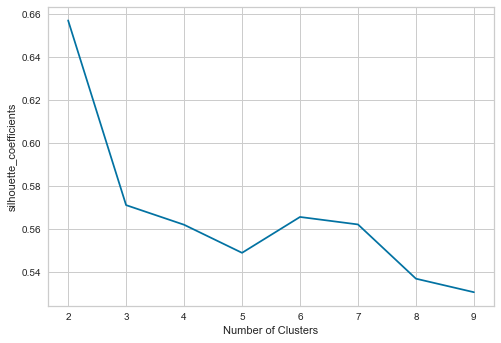

In [16]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(yn)
    score  =silhouette_score(yn, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients) 
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()
    

In [17]:
from sklearn.decomposition import PCA


In [18]:
pca = PCA()
X = pca.fit_transform(yn)


In [19]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

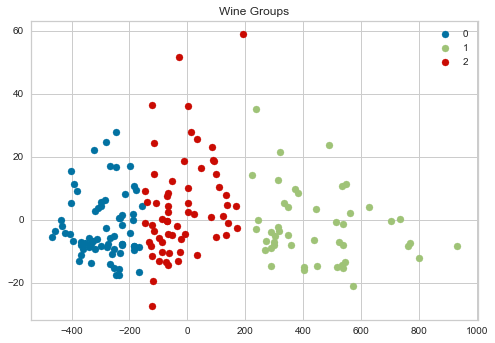

In [20]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label = i)
plt.legend()
plt.title("Wine Groups")
plt.show()

In [21]:
# From KMean Method, we found out the optimum number of cluster = 3

# Agglomerative Heirarchial Clustering

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 3)

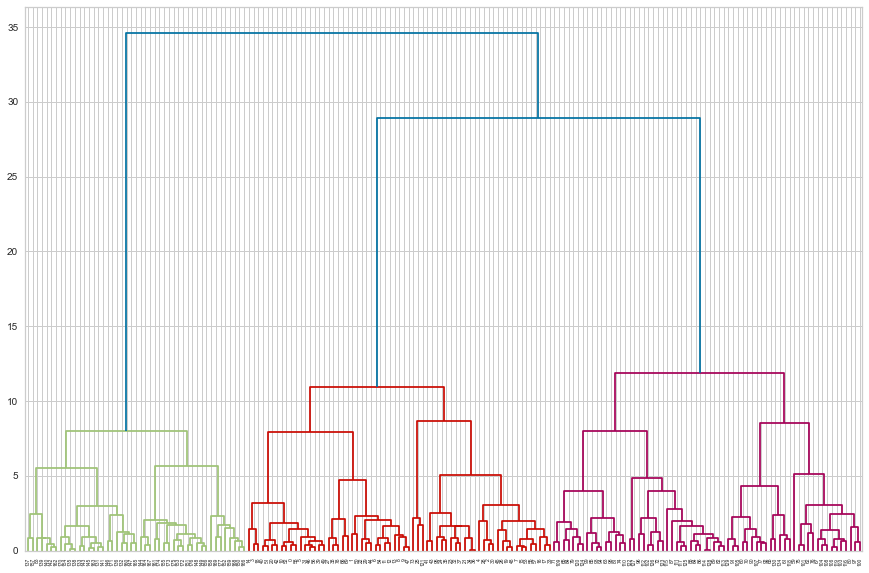

In [23]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(x_pca,method = "ward")
plt.figure(figsize=(15,10))
dendrogram(linked,orientation = "top",distance_sort = "ascending",show_leaf_counts=True)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 3,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(scaled_data)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [25]:
 # Here also we can find number of cluster to be 3

We can fix KMean Model